In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("ccdefault.csv",index_col="ID")
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [2]:
from sklearn.model_selection import train_test_split

X, y = df.drop(["DEFAULT"],axis=1) ,df['DEFAULT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=42)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold,cross_validate,GridSearchCV
from sklearn import tree

hyperparameters = {'n_estimators': [10, 50, 100]}

rfc = RandomForestClassifier()

grid_search = GridSearchCV(rfc, hyperparameters, cv=10, scoring='accuracy',return_train_score = True) # not using cv
grid_search.fit(X, y)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100]},
             return_train_score=True, scoring='accuracy')

In [4]:
result = grid_search.cv_results_
rf_result_score = pd.DataFrame({'Params':result['params'] ,
                                'Training Score' : result['mean_train_score'],
                                'Test Score': result['mean_test_score'],
                                'Occured Time': result['mean_score_time']
                                })
rf_result_score

,Params,Training Score,Test Score,Occured Time
0,{'n_estimators': 10},0.979415,0.806133,0.014141
1,{'n_estimators': 50},0.998737,0.815667,0.043946
2,{'n_estimators': 100},0.999333,0.816300,0.097388


<function matplotlib.pyplot.show(*args, **kw)>

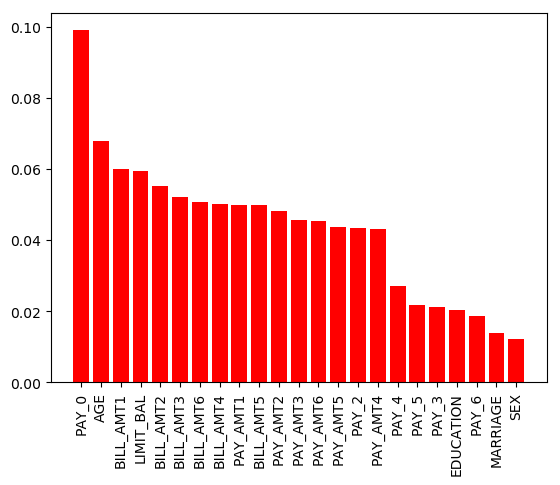

In [21]:
import matplotlib.pyplot as plt

best_model = grid_search.best_estimator_
features = best_model.feature_importances_
features_sorted = np.argsort(features)[::-1]
plt.bar(X.columns[features_sorted],features[features_sorted],color = 'red')
plt.xticks(rotation = 90)
plt.show

In [22]:
print("My name is Hyoung Woo Hahm")
print("My NetID is: 661790448")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hyoung Woo Hahm
My NetID is: 661790448
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


In [ ]:
›